## 1. Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

## 2. Load your dataset

In [2]:
cars_data = pd.read_csv('Cars.csv')

In [3]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## 3.1 Perform data analysis

In [4]:
cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [5]:
cars_data.tail()

,HP,MPG,VOL,SP,WT
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [6]:
cars_data.shape

(81, 5)

In [7]:
cars_data.isnull()

,HP,MPG,VOL,SP,WT
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
76,False,False,False,False,False
77,False,False,False,False,False
78,False,False,False,False,False
79,False,False,False,False,False


In [8]:
cars_data.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

## 3.2 Perform Assumptions Check

### Let's Test the Assumptions

#### Assumption 1 : - Normally distributed

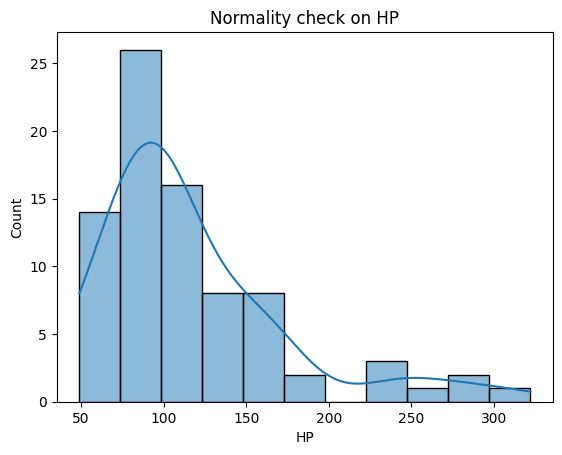

In [9]:
sns.histplot(data=cars_data["HP"],kde=True)
plt.title("Normality check on HP")
plt.show()

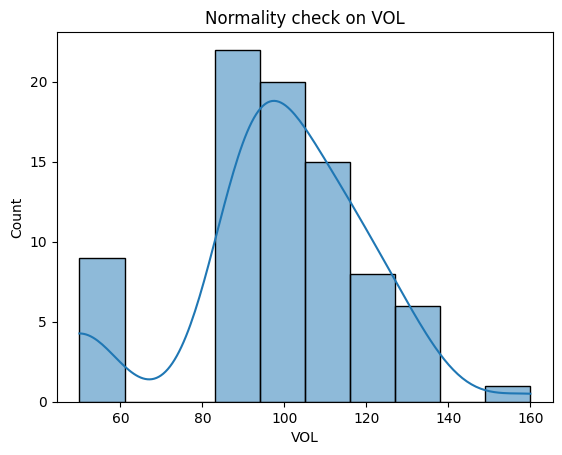

In [10]:
sns.histplot(data=cars_data["VOL"],kde=True)
plt.title("Normality check on VOL")
plt.show()

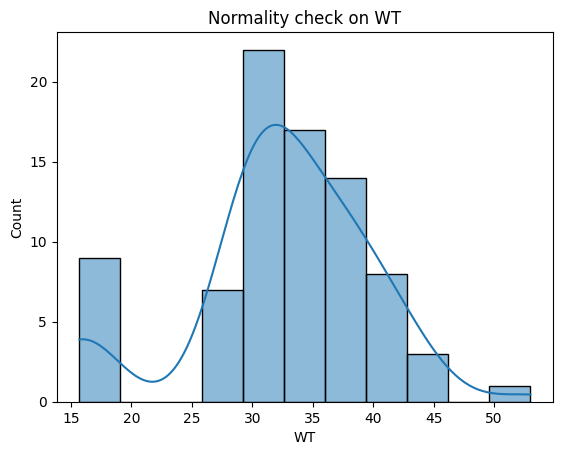

In [11]:
sns.histplot(data=cars_data["WT"],kde=True)
plt.title("Normality check on WT")
plt.show()

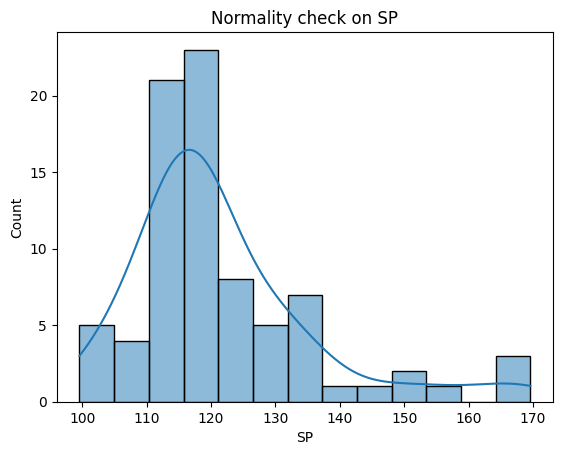

In [12]:
sns.histplot(data=cars_data["SP"],kde=True)
plt.title("Normality check on SP")
plt.show()

**- Normally distributed test is failed**

#### Assumption 2 :- Linearity test

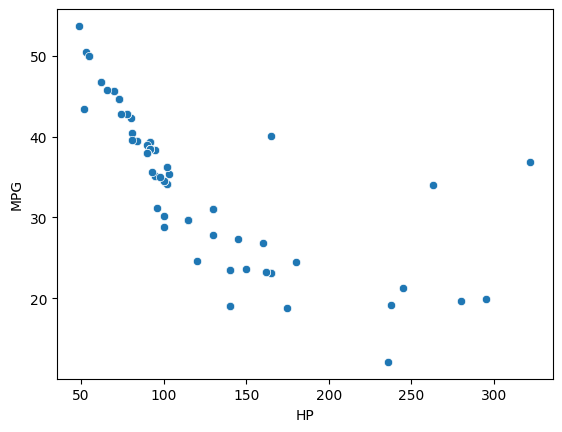

In [13]:
sns.scatterplot(data=cars_data, x='HP',y='MPG')
plt.show()

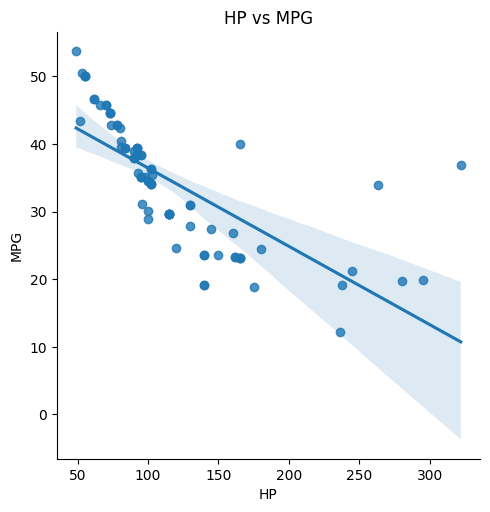

In [14]:
sns.lmplot(data=cars_data, x='HP',y='MPG')
plt.title("HP vs MPG")
plt.show()

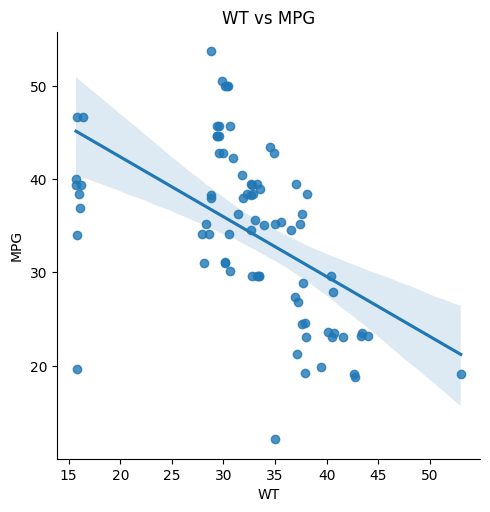

In [15]:
sns.lmplot(data=cars_data, x='WT',y='MPG')
plt.title("WT vs MPG")
plt.show()

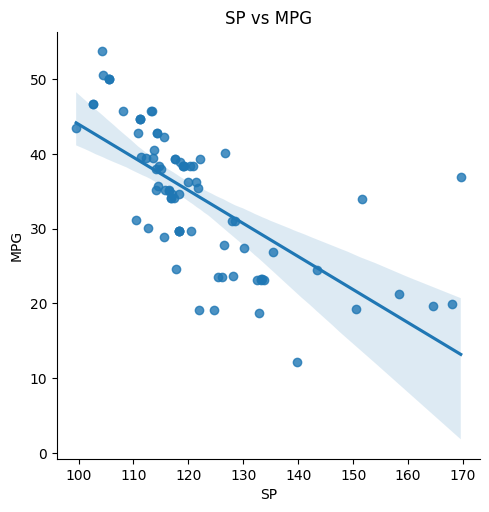

In [16]:
sns.lmplot(data=cars_data, x='SP',y='MPG')
plt.title("SP vs MPG")
plt.show()

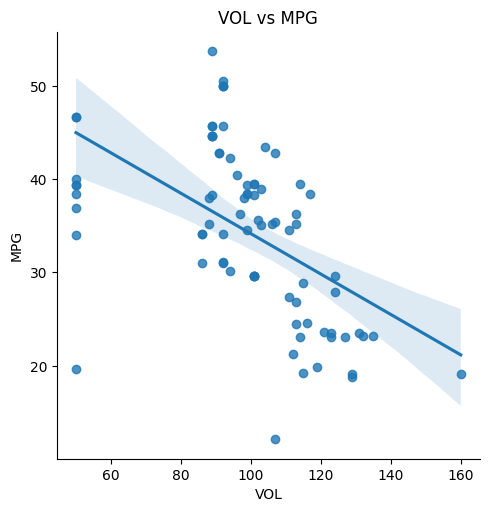

In [17]:
sns.lmplot(data=cars_data, x='VOL',y='MPG')
plt.title("VOL vs MPG")
plt.show()

**- Linearity test also failed**

### Assumption 3 : Multicollinerlirty

In [18]:
cars_corr=cars_data.corr()

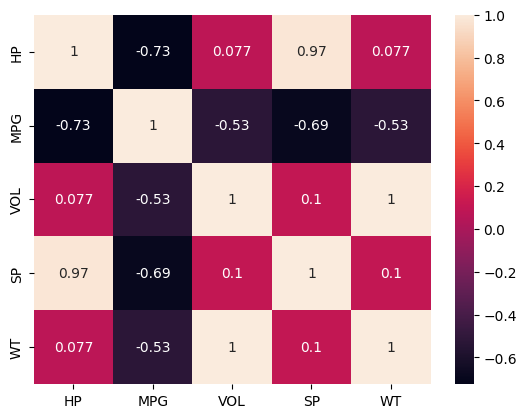

In [19]:
sns.heatmap(data=cars_corr,annot=True)
plt.show()

**- Multicollinearity Test also failed**

### Assumption 4 : No Autoregression

**- There is no date/time in the features**

## 4. Data preparation
-  Everything is fine with our data

## 5. Model Building 

In [20]:
x = cars_data.drop("MPG",axis=1)
y = cars_data [["MPG"]]

In [21]:
x.shape

(81, 4)

In [22]:
y.shape

(81, 1)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_test_split(x,y,test_size=0.02,random_state=123)

[     HP  VOL          SP         WT
 4    53   92  104.461264  29.889149
 80  236  107  139.840817  34.948615
 29  103  107  121.840817  35.549360
 64  150  121  128.128401  40.159482
 24   95   89  119.185353  28.781728
 ..  ...  ...         ...        ...
 73  140  160  124.715241  52.997752
 47   98  103  116.472936  33.910056
 57  115  101  118.288996  32.734518
 17   92   50  117.598513  16.194122
 66  165  114  132.484609  37.979956
 
 [79 rows x 4 columns],
      HP  VOL          SP         WT
 71  162  135  133.415985  44.013139
 76  322   50  169.598513  16.132947,
           MPG
 4   50.504232
 80  12.101263
 29  35.404192
 64  23.605158
 24  38.310606
 ..        ...
 73  19.086341
 47  35.052330
 57  29.629936
 17  39.354094
 66  23.103172
 
 [79 rows x 1 columns],
           MPG
 71  23.203569
 76  36.900000]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02)

In [26]:
x_train

,HP,VOL,SP,WT
66,165,114,132.484609,37.979956
26,92,117,120.760520,38.062823
50,115,101,118.288996,33.213954
65,165,50,126.598513,15.712859
10,73,89,111.185353,29.363341
...,...,...,...,...
1,55,92,105.461264,30.466833
23,81,96,113.829145,31.837122
62,140,131,126.048103,43.390988
71,162,135,133.415985,44.013139


In [27]:
x_test

,HP,VOL,SP,WT
53,180,113,143.392639,37.620695
21,74,107,110.840817,34.908211


In [28]:
y_train

,MPG
66,23.103172
26,38.411003
50,29.629936
65,40.050000
10,44.652834
...,...
1,50.013401
23,40.474723
62,23.515917
71,23.203569


In [29]:
y_test

,MPG
53,24.487367
21,42.828479


## 6. Model Training

In [30]:
linear_model = LinearRegression()

In [31]:
linear_model

LinearRegression()

In [32]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [33]:
linear_model.coef_

array([[-0.20964021, -0.46873231,  0.42060842,  0.79360763]])

In [34]:
linear_model.intercept_

array([28.47136377])

## 7. Model Testing

In [35]:
y_trained = linear_model.predict(x_train)

In [36]:
y_trained

array([[26.31057069],
       [35.34262245],
       [33.13297104],
       [36.16235845],
       [41.51892001],
       [35.5251803 ],
       [33.32702205],
       [39.16333261],
       [37.36844067],
       [34.55577635],
       [28.47483263],
       [43.1703388 ],
       [41.32166992],
       [37.59668508],
       [38.93471628],
       [36.18358168],
       [32.10515327],
       [36.98398556],
       [36.0264911 ],
       [38.67156442],
       [41.71182897],
       [33.30975287],
       [34.16321125],
       [20.67005061],
       [38.07589287],
       [34.21950921],
       [48.0625519 ],
       [46.68093426],
       [37.73993095],
       [28.48028458],
       [18.10262722],
       [24.41786979],
       [15.39562953],
       [35.35269223],
       [23.73488354],
       [42.22871553],
       [35.54797198],
       [34.99852651],
       [18.64026561],
       [28.94329112],
       [47.76775519],
       [26.49303554],
       [28.12431142],
       [30.08584143],
       [48.17386441],
       [37

In [37]:
y_tested = linear_model.predict(x_test)

In [38]:
y_tested

array([[27.93759649],
       [37.12763473]])

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [40]:
mean_squared_error(y_train,y_trained)

18.847749422177706

In [41]:
y_test

,MPG
53,24.487367
21,42.828479


In [42]:
mean_squared_error(y_test,y_tested)

22.20185791438254

## 8. Model Evalution

In [ ]:
error = y-y_trained

In [ ]:
error

In [ ]:
error_flattened = error.values.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error.mean_absolute error

In [ ]:
#Choose mean_squared_error, When you hane no outliers.
#Choose mean_absolute error, Whene you have outliers.

## Assumption 5 Homoscedasticity
-  Its a plot between Input and error

In [ ]:
sns.scatterplot(data = cars_data, x = 'HP', y = error_flattened)
plt.show()

In [ ]:
plt.scatter(x = cars_data['HP'],y = error)
plt.xlabel('HP')
plt.ylabel('Error')
plt.title('Homoscadacity Test between HP and Error')
plt.show()

In [ ]:
plt.scatter(x = cars_data['SP'],y = error)
plt.xlabel('SP')
plt.ylabel('Error')
plt.title('Homoscadacity Test between SP and Error')
plt.show()

In [ ]:
plt.scatter(x = cars_data['VOL'],y = error)
plt.xlabel('VOL')
plt.ylabel('Error')
plt.title('Homoscadacity Test between VOL and Error')
plt.show()

In [ ]:
plt.scatter(x = cars_data['WT'],y = error)
plt.xlabel('WT')
plt.ylabel('Error')
plt.title('Homoscadacity Test between WT and Error')
plt.show()

 **- Homoscadacity Test is failed**

## Assumption 6 Zero residual
-  Zero residual - Actual output vs predict output

In [ ]:
plt.scatter(x=y,y=y_t)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual Output vs Predicted Output')
plt.show()

**- Zero Residual Test failed**

## Using Statsmodel to build Linear Regression

### NOTE:
Linear Regression can be built using 2 libraries:
1. sklearn
2. statsmodels

In [45]:
import statsmodels.formula.api as smf

In [46]:
model_ols=smf.ols(formula= "MPG~HP",data=cars_data).fit()

In [47]:
model_ols.params

Intercept    48.039202
HP           -0.115921
dtype: float64

In [48]:
model_ols=smf.ols(formula= "MPG~HP+VOL+SP+WT",data=cars_data).fit()

In [49]:
model_ols.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

## AIC
-  The Akaike information criterion (AIC) is a metric used to compare the fit of different regression models. 
-  The lower the AIC, the better the model fit.

## BIC
-  The Bayesian Information Criterion (BIC) is a metric used to compare the goodness of fit of different regression models.
-  A lower BIC indicates a better balance between model fit and complexity

In [50]:
model_1=smf.ols(formula= "MPG~HP",data=cars_data).fit()

In [51]:
print("AIC value for model 1 is", model_1.aic)
print("BIC value for model 1 is", model_1.bic)

AIC value for model 1 is 530.7452702659343
BIC value for model 1 is 535.5341685752792


In [52]:
model_2=smf.ols(formula= "MPG~HP+VOL",data=cars_data).fit()

In [53]:
print("AIC value for model 2 is", model_2.aic)
print("BIC value for model 2 is", model_2.bic)

AIC value for model 2 is 480.6569237052377
BIC value for model 2 is 487.84027116925506


In [54]:
model_3=smf.ols(formula= "MPG~HP+VOL+SP",data=cars_data).fit()

In [55]:
print("AIC value for model 3 is", model_3.aic)
print("BIC value for model 3 is", model_3.bic)

AIC value for model 3 is 475.9875158854609
BIC value for model 3 is 485.56531250415065


In [56]:
model_4=smf.ols(formula= "MPG~HP+VOL+SP+WT",data=cars_data).fit()

In [57]:
print("AIC value for model 4 is", model_4.aic)
print("BIC value for model 4 is", model_4.bic)

AIC value for model 4 is 477.9279049354879
BIC value for model 4 is 489.9001507088501


## 9. Model Deployment